Building Games with AI (iPython Notebook)
==================================
The following code examples are related to AI algorithms for games. Useful Python packages are "simpleai", "easyAI" and "python-chess".

Example 1: Building an 8-puzzle solver
----------------------------------------------------------
We will use an A* algorithm to solve this problem. It is an algorithm that's used to find paths to the solution in a graph. This algorithm is a combination of Dijkstra's algorithm and a greedy best-first search. Instead of blindly guessing where to go next, the A* algorithm picks the one that looks the most promising. At each node, we generate the list of all possibilities and then pick the one with the minimal cost required to reach the goal.

Let's see how to define the cost function. At each node, we need to compute the cost. This cost is basically the sum of two costs - the first cost is the cost of getting to the current node and the second cost is the cost of reaching the goal from the current node.

We use this summation as our heuristic. As we can see, the second cost is basically an estimate that's not perfect. If this is perfect, then the A* algorithm arrives at the solution quickly. But it's not usually the case. It takes some time to find the best path to the solution. But A* is very effective in finding the optimal paths and is one of the most popular techniques out there. Let's use the A* algorithm to build an 8-puzzle solver. This is a variant of the solution given in the simpleai library.

In [1]:
# we use the simpleai package and need some helper functions
from simpleai.search import astar, SearchProblem

# Convert list to string
def list_to_string(input_list):
    return '\n'.join(['-'.join(x) for x in input_list])

# Convert string to list
def string_to_list(input_string):
    return [x.split('-') for x in input_string.split('\n')]

# Find the 2D location of the input element 
def get_location(rows, input_element):
    for i, row in enumerate(rows):
        for j, item in enumerate(row):
            if item == input_element:
                return i, j

In [2]:
# Class containing methods to solve the puzzle
class PuzzleSolver(SearchProblem):
    # Action method to get the list of the possible 
    # numbers that can be moved in to the empty space 
    def actions(self, cur_state):
        rows = string_to_list(cur_state)
        row_empty, col_empty = get_location(rows, 'e')

        actions = []
        if row_empty > 0:
            actions.append(rows[row_empty - 1][col_empty])
        if row_empty < 2:
            actions.append(rows[row_empty + 1][col_empty])
        if col_empty > 0:
            actions.append(rows[row_empty][col_empty - 1])
        if col_empty < 2:
            actions.append(rows[row_empty][col_empty + 1])

        return actions

    # Return the resulting state after moving a piece to the empty space
    def result(self, state, action):
        rows = string_to_list(state)
        row_empty, col_empty = get_location(rows, 'e')
        row_new, col_new = get_location(rows, action)

        rows[row_empty][col_empty], rows[row_new][col_new] = \
                rows[row_new][col_new], rows[row_empty][col_empty]

        return list_to_string(rows)

    # Returns true if a state is the goal state
    def is_goal(self, state):
        return state == GOAL

    # Returns an estimate of the distance from a state to 
    # the goal using the manhattan distance
    def heuristic(self, state):
        rows = string_to_list(state)

        distance = 0

        for number in '12345678e':
            row_new, col_new = get_location(rows, number)
            row_new_goal, col_new_goal = goal_positions[number]

            distance += abs(row_new - row_new_goal) + abs(col_new - col_new_goal)

        return distance

In [3]:
# Final result that we want to achieve
GOAL = '''1-2-3
4-5-6
7-8-e'''

# Starting point
INITIAL = '''1-e-2
6-3-4
7-5-8'''

# Create a cache for the goal position of each piece
goal_positions = {}
rows_goal = string_to_list(GOAL)
for number in '12345678e':
    goal_positions[number] = get_location(rows_goal, number)

# Create the solver object
result = astar(PuzzleSolver(INITIAL))

# Print the results
for i, (action, state) in enumerate(result.path()):
    print()
    if action == None:
        print('Initial configuration')
    elif i == len(result.path()) - 1:
        print('After moving', action, 'into the empty space. Goal achieved!')
    else:
        print('After moving', action, 'into the empty space')

    print(state)


Initial configuration
1-e-2
6-3-4
7-5-8

After moving 2 into the empty space
1-2-e
6-3-4
7-5-8

After moving 4 into the empty space
1-2-4
6-3-e
7-5-8

After moving 3 into the empty space
1-2-4
6-e-3
7-5-8

After moving 6 into the empty space
1-2-4
e-6-3
7-5-8

After moving 1 into the empty space
e-2-4
1-6-3
7-5-8

After moving 2 into the empty space
2-e-4
1-6-3
7-5-8

After moving 4 into the empty space
2-4-e
1-6-3
7-5-8

After moving 3 into the empty space
2-4-3
1-6-e
7-5-8

After moving 6 into the empty space
2-4-3
1-e-6
7-5-8

After moving 4 into the empty space
2-e-3
1-4-6
7-5-8

After moving 2 into the empty space
e-2-3
1-4-6
7-5-8

After moving 1 into the empty space
1-2-3
e-4-6
7-5-8

After moving 4 into the empty space
1-2-3
4-e-6
7-5-8

After moving 5 into the empty space
1-2-3
4-5-6
7-e-8

After moving 8 into the empty space. Goal achieved!
1-2-3
4-5-6
7-8-e


Example 2: Building a maze solver
--------------------------------------------------
Let's use the A* algorithm to solve a maze:

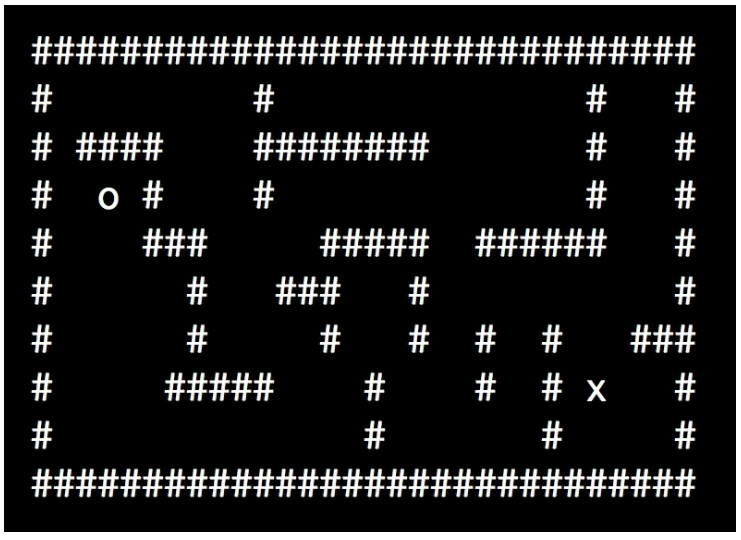

The # symbols indicate obstacles. The symbol o represents the starting point and x represents the goal. Our goal is to find the shortest path from the start to the end point. Let's see how to do it in Python. The following solution is a variant of the solution provided in the simpleai library.

In [4]:
# we need the math and the simpleai package
import math
from simpleai.search import SearchProblem, astar

# Class containing the methods to solve the maze
class MazeSolver(SearchProblem):
    # Initialize the class 
    def __init__(self, board):
        self.board = board
        self.goal = (0, 0)

        for y in range(len(self.board)):
            for x in range(len(self.board[y])):
                if self.board[y][x].lower() == "o":
                    self.initial = (x, y)
                elif self.board[y][x].lower() == "x":
                    self.goal = (x, y)

        super(MazeSolver, self).__init__(initial_state=self.initial)

    # Define the method that takes actions
    # to arrive at the solution
    def actions(self, state):
        actions = []
        for action in COSTS.keys():
            newx, newy = self.result(state, action)
            if self.board[newy][newx] != "#":
                actions.append(action)

        return actions

    # Update the state based on the action
    def result(self, state, action):
        x, y = state

        if action.count("up"):
            y -= 1
        if action.count("down"):
            y += 1
        if action.count("left"):
            x -= 1
        if action.count("right"):
            x += 1

        new_state = (x, y)

        return new_state

    # Check if we have reached the goal
    def is_goal(self, state):
        return state == self.goal

    # Compute the cost of taking an action
    def cost(self, state, action, state2):
        return COSTS[action]

    # Heuristic that we use to arrive at the solution
    def heuristic(self, state):
        x, y = state
        gx, gy = self.goal

        return math.sqrt((x - gx) ** 2 + (y - gy) ** 2)

In [8]:
# Define the map
MAP = """
##############################
#         #              #   #
# ####    ########       #   #
#  o #    #              #   #
#    ###     #####  ######   #
#      #   ###   #           #
#      #     #   #  #  #   ###
#     #####    #    #  # x   #
#              #       #     #
##############################
"""

# Convert map to a list
print(MAP)
MAP = [list(x) for x in MAP.split("\n") if x]

# Define cost of moving around the map
cost_regular = 1.0
cost_diagonal = 1.7

# Create the cost dictionary
COSTS = {
    "up": cost_regular,
    "down": cost_regular,
    "left": cost_regular,
    "right": cost_regular,
    "up left": cost_diagonal,
    "up right": cost_diagonal,
    "down left": cost_diagonal,
    "down right": cost_diagonal,
}

# Create maze solver object
problem = MazeSolver(MAP)

# Run the solver
result = astar(problem, graph_search=True)

# Extract the path
path = [x[1] for x in result.path()]

# Print starting state and the result
print()
for y in range(len(MAP)):
    for x in range(len(MAP[y])):
        if (x, y) == problem.initial:
            print('o', end='')
        elif (x, y) == problem.goal:
            print('x', end='')
        elif (x, y) in path:
            print('·', end='')
        else:
            print(MAP[y][x], end='')
    print()


##############################
#         #              #   #
# ####    ########       #   #
#  o #    #              #   #
#    ###     #####  ######   #
#      #   ###   #           #
#      #     #   #  #  #   ###
#     #####    #    #  # x   #
#              #       #     #
##############################


##############################
#         #              #   #
# ####    ########       #   #
#  o #    #              #   #
#   ·###     #####  ######   #
#   ·  #   ###   #  ····     #
#   ·  #     # ··# ·#  #·  ###
#    ·#####   ·# ·· #  # x   #
#     ········ #       #     #
##############################


### Exercise 6.1: Alter the initial state of the 8-puzzle and the maze - experiment with the two solvers! Find a configuration for each example for which the task is not solvable. What happens?

Example 3: Building a bot to play Last Coin Standing
----------------------------------------------------------------------------
This is a game where we have a pile of coins and each player takes turns to take a number of coins from the pile. There is a lower and an upper bound on the number of coins that can be taken from the pile. The goal of the game is to avoid taking the last coin in the pile. This recipe is a variant of the Game of Bones recipe given in the easyAI library. Let's see how to build a game where the computer can play against the user.

In [9]:
# install on first time: > pip3 install easyAI
from easyAI import TwoPlayersGame, id_solve, Human_Player, AI_Player
from easyAI.AI import TT

class LastCoinStanding(TwoPlayersGame):
    def __init__(self, players):
        # Define the players. Necessary parameter.
        self.players = players

        # Define who starts the game. Necessary parameter.
        self.nplayer = 1 

        # Overall number of coins in the pile 
        self.num_coins = 25

        # Define max number of coins per move 
        self.max_coins = 4 

    # Define possible moves
    def possible_moves(self): 
        return [str(x) for x in range(1, self.max_coins + 1)]
    
    # Remove coins
    def make_move(self, move): 
        self.num_coins -= int(move) 

    # Did the opponent take the last coin?
    def win(self): 
        return self.num_coins <= 0 

    # Stop the game when somebody wins 
    def is_over(self): 
        return self.win() 

    # Compute score
    def scoring(self): 
        return 100 if self.win() else 0

    # Show number of coins remaining in the pile
    def show(self): 
        print(self.num_coins, 'coins left in the pile')

In [ ]:
# Define the transposition table
tt = TT()

# Define the method
LastCoinStanding.ttentry = lambda self: self.num_coins

# Solve the game
result, depth, move = id_solve(LastCoinStanding, 
        range(2, 20), win_score=100, tt=tt)
print(result, depth, move)  

# Start the game 
game = LastCoinStanding([AI_Player(tt), Human_Player()])
game.play()

Example 4: Building a bot to play Tic-Tac-Toe
-----------------------------------------------------------------
Tic-Tac-Toe (Noughts and Crosses) is probably one of the most famous games. Let's see how to build a game where the computer can play against the user. This is a minor variant of the Tic-Tac-Toe recipe given in the easyAI library.

In [10]:
from easyAI import TwoPlayersGame, AI_Player, Negamax
from easyAI.Player import Human_Player

class GameController(TwoPlayersGame):
    def __init__(self, players):
        # Define the players
        self.players = players

        # Define who starts the game
        self.nplayer = 1 

        # Define the board
        self.board = [0] * 9

    # Define possible moves
    def possible_moves(self):
        return [a + 1 for a, b in enumerate(self.board) if b == 0]

    # Make a move
    def make_move(self, move):
        self.board[int(move) - 1] = self.nplayer

    # Does the opponent have three in a line?
    def loss_condition(self):
        possible_combinations = [[1,2,3], [4,5,6], [7,8,9],
            [1,4,7], [2,5,8], [3,6,9], [1,5,9], [3,5,7]]

        return any([all([(self.board[i-1] == self.nopponent)
                for i in combination]) for combination in possible_combinations]) 

    # Check if the game is over
    def is_over(self):
        return (self.possible_moves() == []) or self.loss_condition()

    # Show current position
    def show(self):
        print('\n'+'\n'.join([' '.join([['.', 'O', 'X'][self.board[3*j + i]]
                for i in range(3)]) for j in range(3)]))

    # Compute the score
    def scoring(self):
        return -100 if self.loss_condition() else 0

In [7]:
# Define the algorithm
algorithm = Negamax(7)

# Start the game
GameController([Human_Player(), AI_Player(algorithm)]).play()


. . .
. . .
. . .

Player 1 what do you play ? 5

Move #1: player 1 plays 5 :

. . .
. O .
. . .

Move #2: player 2 plays 1 :

X . .
. O .
. . .

Player 1 what do you play ? 9

Move #3: player 1 plays 9 :

X . .
. O .
. . O

Move #4: player 2 plays 3 :

X . X
. O .
. . O

Player 1 what do you play ? 2

Move #5: player 1 plays 2 :

X O X
. O .
. . O

Move #6: player 2 plays 8 :

X O X
. O .
. X O

Player 1 what do you play ? 4

Move #7: player 1 plays 4 :

X O X
O O .
. X O

Move #8: player 2 plays 6 :

X O X
O O X
. X O

Player 1 what do you play ? 7

Move #9: player 1 plays 7 :

X O X
O O X
O X O


[(<__main__.GameController at 0x221dd4d8208>, 5),
 (<__main__.GameController at 0x221ddd4f320>, 1),
 (<__main__.GameController at 0x221ddd50f98>, 9),
 (<__main__.GameController at 0x221ddd38198>, 3),
 (<__main__.GameController at 0x221ddd2a400>, 2),
 (<__main__.GameController at 0x221ddd54da0>, 8),
 (<__main__.GameController at 0x221ddd55dd8>, 4),
 (<__main__.GameController at 0x221ddd55518>, 6),
 (<__main__.GameController at 0x221ddd55630>, 7),

### Exercise 6.2: Play with the last algorithm and change the algorithm (Minimax, Alpha-Beta-Pruning). Have a look at the documentation of the easyAI package.

Example 5: Monte Carlo Tree Search
-----------------------------------------------------
Monte Carlo tree search (MCTS) is a general game-playing algorithm to find the best move from any given game state of any game. There are other such algorithms, most notably minimax, but there are significant benefits to using MCTS over vanilla minimax:
* To determine which moves are good, depth-limited minimax needs a function that gives the estimated strength of any given game state. This heuristic function may be difficult to obtain, for example in the case of Go. MCTS does not need such a heuristic function, making it aheuristic.
* MCTS efficiently deals with games with a high branching factor. As it gains information, MCTS increasingly favors moves that are more likely to be good, making its search asymmetric.
* Minimax needs to run to completion to give the best move, which makes its runtime (and run-space) non-flexible. For games with large state spaces like chess and Go, this exhaustive search may even be intractable. MCTS does not need to run to completion; it outputs stronger plays the longer it runs, but its search can be stopped at any point. Having this flexible property, we say that MCTS is anytime.

While minimax is an elegant algorithm for solving simple games, MCTS is a more powerful alternative for more complex games — even as it gives us approximate solutions instead of absolute ones. Being aheuristic, asymmetric, and anytime makes MCTS an attractive option for complex general game-playing.

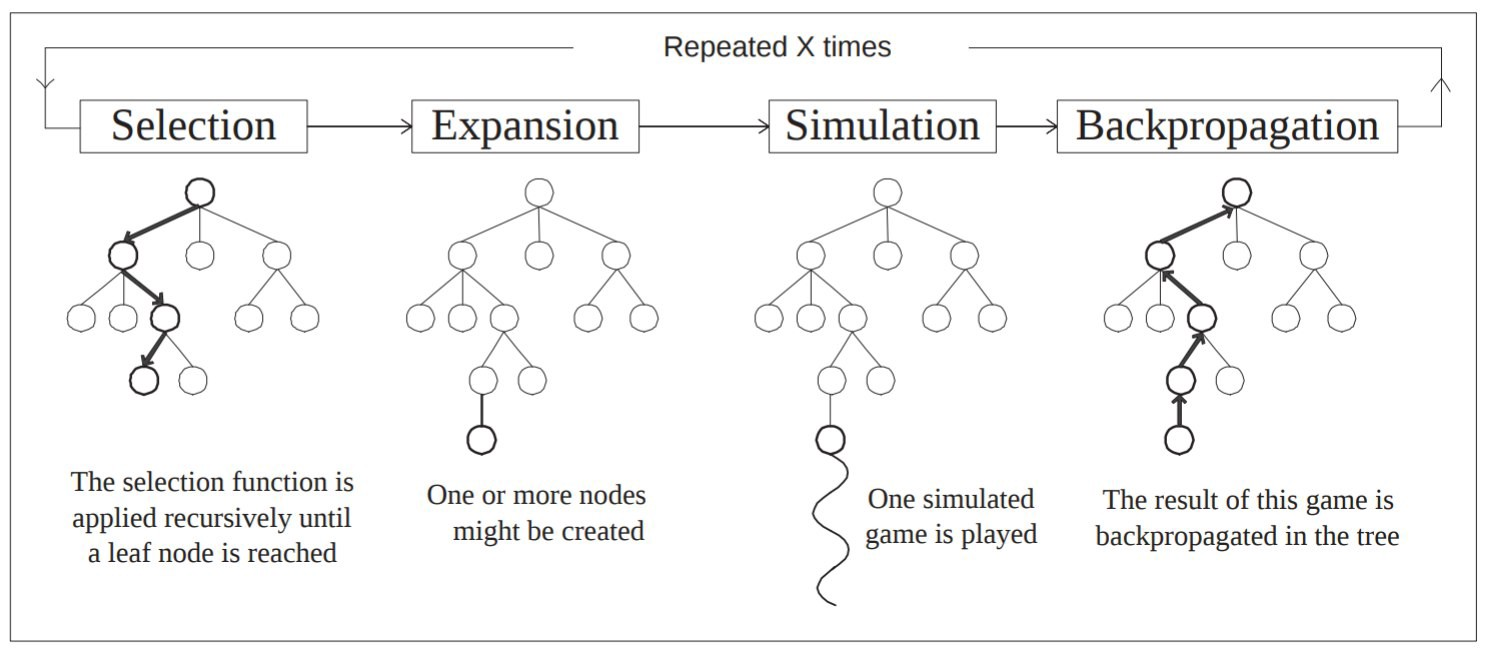



In [11]:
import numpy as np
from collections import defaultdict

# first we need some generic classes for games (states and
# actions of two-player-games)
class TwoPlayersGameState:

    def __init__(self, state, next_to_move):
        self.state = state
        self.next_to_move = next_to_move

    def game_result(self):
        raise NotImplemented("Implement game_result function")

    def is_game_over(self):
        raise NotImplemented("Implement is_game_over function")

    def move(self, action):
        raise NotImplemented("Implement move function")

    def get_legal_actions(self):
        raise NotImplemented("Implement get_legal_actions function")

class Action:
    pass

# these classes are for the Tic-Tac-Toe game
class TicTacToeMove(Action):

    def __init__(self, x_coordinate, y_coordinate, value):
        self.x_coordinate = x_coordinate
        self.y_coordinate = y_coordinate
        self.value = value

    def __repr__(self):
        return "x:" + str(self.x_coordinate) + " y:" + str(self.y_coordinate) + " v:" + str(self.value)


class TicTacToeGameState(TwoPlayersGameState):

    x = 1
    o = -1

    def __init__(self, state, next_to_move = 1):
        if len(state.shape) != 2 or state.shape[0] != state.shape[1]:
            raise ValueError("Please play on 2D square board")
        self.board = state
        self.board_size = state.shape[0]
        self.next_to_move = next_to_move

    @property
    def game_result(self):
        # check if game is over
        rowsum = np.sum(self.board,0)
        colsum = np.sum(self.board,1)
        diag_sum_tl = self.board.trace()
        diag_sum_tr = self.board[::-1].trace()

        if any(rowsum == self.board_size) or any(colsum == self.board_size) or diag_sum_tl == self.board_size or diag_sum_tr == self.board_size:            
            return 1.
        elif any(rowsum == -self.board_size) or any(colsum == -self.board_size) or diag_sum_tl == -self.board_size or diag_sum_tr == -self.board_size:

            return -1.
        elif np.all(self.board != 0):
            return 0.
        else:
            # if not over - no result
             return None

    def is_game_over(self):
        return self.game_result != None

    def is_move_legal(self, move):
        # check if correct player moves
        if move.value != self.next_to_move:
            return False

        # check if inside the board
        x_in_range = move.x_coordinate < self.board_size and move.x_coordinate >= 0
        if not x_in_range:
            return False

        # check if inside the board
        y_in_range = move.y_coordinate < self.board_size and move.y_coordinate >= 0
        if not y_in_range:
            return False

        # finally check if board field not occupied yet
        return self.board[move.x_coordinate, move.y_coordinate] == 0

    def move(self, move):
        if not self.is_move_legal(move):
            raise ValueError("move " + move + " on board " + self.board + " is not legal")
        new_board = np.copy(self.board)
        new_board[move.x_coordinate, move.y_coordinate] = move.value
        next_to_move = TicTacToeGameState.o if self.next_to_move == TicTacToeGameState.x else TicTacToeGameState.x
        return TicTacToeGameState(new_board, next_to_move)

    def get_legal_actions(self):
        indices = np.where(self.board == 0)
        return [TicTacToeMove(coords[0], coords[1], self.next_to_move) for coords in list(zip(indices[0], indices[1]))]


In [12]:
# class for a MCTS node
# assuming it is a two-player-game
class MonteCarloTreeSearchNode:

    def __init__(self, state: TwoPlayersGameState, parent = None):
        self.state = state
        self.parent = parent
        self.children = []

    @property
    def untried_actions(self):
        raise NotImplemented()

    @property
    def q(self):
        raise NotImplemented()

    @property
    def n(self):
        raise NotImplemented()

    def expand(self):
        raise NotImplemented()

    def is_terminal_node(self):
        raise NotImplemented()

    def rollout(self):
        raise NotImplemented()

    def backpropagate(self, reward):
        raise NotImplemented()

    def is_fully_expanded(self):
        return len(self.untried_actions) == 0

    def best_child(self, c_param = 1.4):
        choices_weights = [
            (c.q / (c.n)) + c_param * np.sqrt((2 * np.log(self.n) / (c.n)))
            for c in self.children
        ]
        return self.children[np.argmax(choices_weights)]

    def rollout_policy(self, possible_moves):        
        return possible_moves[np.random.randint(len(possible_moves))]

class TwoPlayersGameMonteCarloTreeSearchNode(MonteCarloTreeSearchNode):

    def __init__(self, state: TwoPlayersGameState, parent):
        super(TwoPlayersGameMonteCarloTreeSearchNode, self).__init__(state, parent)
        self._number_of_visits = 0.
        self._results = defaultdict(int)

    @property
    def untried_actions(self):
        if not hasattr(self, '_untried_actions'):
            self._untried_actions = self.state.get_legal_actions()
        return self._untried_actions

    @property
    def q(self):
        wins = self._results[self.parent.state.next_to_move]
        loses = self._results[-1 * self.parent.state.next_to_move]
        return wins - loses

    @property
    def n(self):
        return self._number_of_visits

    def expand(self):
        action = self.untried_actions.pop()
        next_state = self.state.move(action)
        child_node = TwoPlayersGameMonteCarloTreeSearchNode(next_state, parent = self)
        self.children.append(child_node)
        return child_node

    def is_terminal_node(self):
        return self.state.is_game_over()

    def rollout(self):
        current_rollout_state = self.state
        while not current_rollout_state.is_game_over():
            possible_moves = current_rollout_state.get_legal_actions()
            action = self.rollout_policy(possible_moves)
            current_rollout_state = current_rollout_state.move(action)
        return current_rollout_state.game_result

    def backpropagate(self, result):
        self._number_of_visits += 1.
        self._results[result] += 1.
        if self.parent:
            self.parent.backpropagate(result)

In [13]:
# class for the MCTS algorithm itself
class MonteCarloTreeSearch:

    def __init__(self, node: MonteCarloTreeSearchNode):
        self.root = node

    def best_action(self, simulations_number):
        for _ in range(0, simulations_number):            
            v = self.tree_policy()
            reward = v.rollout()
            v.backpropagate(reward)
        # exploitation only
        return self.root.best_child(c_param = 0.)

    def tree_policy(self):
        current_node = self.root
        while not current_node.is_terminal_node():
            if not current_node.is_fully_expanded():
                return current_node.expand()
            else:
                current_node = current_node.best_child()
        return current_node

In [14]:
# now run the simulation
state = np.zeros((3,3))
initial_board_state = TicTacToeGameState(state = state, next_to_move = 1)

root = TwoPlayersGameMonteCarloTreeSearchNode(state = initial_board_state, parent = None)
mcts = MonteCarloTreeSearch(root)
best_node = mcts.best_action(1000)

In [15]:
print(best_node.parent, len(best_node.children), best_node.state, best_node._number_of_visits, best_node._results)

<__main__.TwoPlayersGameMonteCarloTreeSearchNode object at 0x0000012DC898C7B8> 8 <__main__.TicTacToeGameState object at 0x0000012DC898CE80> 296.0 defaultdict(<class 'int'>, {1.0: 200.0, -1: 65.0, 0.0: 31.0})


### Exercise 6.3: Examine the optimal solution (best_node) by following the parents up to the root-node. Moreover, explort the other attributes of the nodes on the path (state, children, _number_of_visits, _results). Remark: You can also implement some of the 'not implemented' methods to get a better insight.

### Exercise 6.4: Alter the number of simulations and figure out if the result changes.

Example 6: Programming a Chess Player
------------------------------------------------------------
In this notebook we will begin to explore symbolic computation by writing a program to play Chess. For these experiments, we will use the python-chess library. Additionally, we will define three different sample players. We explore them in some depth here to attempt to understand how each plays chess.

We will use the chess library in the following manner:
* Create a chess.Board instance
* The chess.Board instance automatically generates all possible moves for the current player
* Current player picks a move
* Go to step 2 and repeat until win, lose, or draw

In [16]:
# we will use the python-chess library: > pip install python-chess
import chess

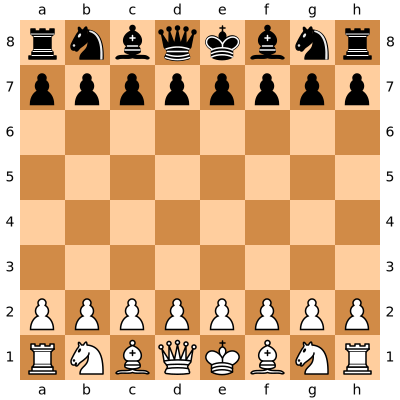

In [17]:
def player(board):
    ### "Thinking" happens here
    return move_code

# create chess board
board = chess.Board()
# white starts...
board.turn == chess.WHITE
board

2


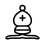

In [18]:
#what is on c1?
print(chess.C1)
# and what is 2???
board.piece_at(chess.C1)

In [19]:
# which moves are possible now?
list(board.legal_moves)

[Move.from_uci('g1h3'),
 Move.from_uci('g1f3'),
 Move.from_uci('b1c3'),
 Move.from_uci('b1a3'),
 Move.from_uci('h2h3'),
 Move.from_uci('g2g3'),
 Move.from_uci('f2f3'),
 Move.from_uci('e2e3'),
 Move.from_uci('d2d3'),
 Move.from_uci('c2c3'),
 Move.from_uci('b2b3'),
 Move.from_uci('a2a3'),
 Move.from_uci('h2h4'),
 Move.from_uci('g2g4'),
 Move.from_uci('f2f4'),
 Move.from_uci('e2e4'),
 Move.from_uci('d2d4'),
 Move.from_uci('c2c4'),
 Move.from_uci('b2b4'),
 Move.from_uci('a2a4')]

In [20]:
# programming a random player
import random

def random_player(board):
    move = random.choice(list(board.legal_moves))
    return move.uci()

for i in range(10):
    print(random_player(board))

f2f4
f2f3
g2g3
h2h4
c2c4
d2d4
f2f4
f2f3
b1c3
g2g4


In [22]:
# let's play a game :-)
import time
from IPython.display import display, HTML, clear_output

def who(player):
    return "White" if player == chess.WHITE else "Black"

def display_board(board, use_svg):
    if use_svg:
        return board._repr_svg_()
    else:
        return "<pre>" + str(board) + "</pre>"

def play_game(player1, player2, visual="svg", pause=0.1):
    """
    playerN1, player2: functions that takes board, return uci move
    visual: "simple" | "svg" | None
    """
    use_svg = (visual == "svg")
    board = chess.Board()
    try:
        while not board.is_game_over(claim_draw=True):
            if board.turn == chess.WHITE:
                uci = player1(board)
            else:
                uci = player2(board)
            name = who(board.turn)
            board.push_uci(uci)
            board_stop = display_board(board, use_svg)
            html = "<b>Move %s %s, Play '%s':</b><br/>%s" % (
                       len(board.move_stack), name, uci, board_stop)
            if visual is not None:
                if visual == "svg":
                    clear_output(wait=True)
                display(HTML(html))
                if visual == "svg":
                    time.sleep(pause)
    except KeyboardInterrupt:
        msg = "Game interrupted!"
        return (None, msg, board)
    result = None
    if board.is_checkmate():
        msg = "checkmate: " + who(not board.turn) + " wins!"
        result = not board.turn
    elif board.is_stalemate():
        msg = "draw: stalemate"
    elif board.is_fivefold_repetition():
        msg = "draw: 5-fold repetition"
    elif board.is_insufficient_material():
        msg = "draw: insufficient material"
    elif board.can_claim_draw():
        msg = "draw: claim"
    if visual is not None:
        print(msg)
    return (result, msg, board)

In [23]:
# go for it - random player vs. random player
play_game(random_player, random_player)

# one could also analyze such simulations
#counts = {None: 0, True: 0, False: 0}
#for i in range(10):
#    result, msg, board = play_game(random_player, random_player, visual=None)
#    counts[result] += 1
#    print(counts)
#counts

checkmate: White wins!


(True, 'checkmate: White wins!', Board('4kR2/8/3Q4/8/8/K7/8/8 b - - 4 131'))

In [24]:
# how to add a human player?
def human_player(board):
    display(board)
    uci = get_move("%s's move [q to quit]> " % who(board.turn))
    legal_uci_moves = [move.uci() for move in board.legal_moves]
    while uci not in legal_uci_moves:
        print("Legal moves: " + (",".join(sorted(legal_uci_moves))))
        uci = get_move("%s's move[q to quit]> " % who(board.turn))
    return uci

def get_move(prompt):
    uci = input(prompt)
    if uci and uci[0] == "q":
        raise KeyboardInterrupt()
    try:
        chess.Move.from_uci(uci)
    except:
        uci = None
    return uci

In [ ]:
play_game(human_player, random_player)